# **TP MACHINE LEARNING 1 . 2025-2026 . KNN ET ARBRES DE DECISION**

**Seconde partie** : iris de Fisher.

On commence par tester les **arbres de décision** sur le jeu de données.

In [1]:
!pip install six
import six
from six import StringIO
import pydotplus
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

1°. Un premier test rapide pour visualiser l'arbre, sans faire de validation croisée.

In [2]:
iris = load_iris()

In [3]:
# A ne pas exécuter par défaut.
print("Noms des variables : " + str(iris.feature_names))
print("Espèce de l'iris : " + str(iris.target_names))
print("Premières mesures : " + str(iris.data[0]))
print("Premières étiquettes : " + str(iris.target[0]))
test_idx = [0, 50, 100]
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)
# Visualisation de l'arbre
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names=iris.feature_names,class_names=iris.target_names,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("iris.pdf")

Noms des variables : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Espèce de l'iris : ['setosa' 'versicolor' 'virginica']
Premières mesures : [5.1 3.5 1.4 0.2]
Premières étiquettes : 0


True

Affichage des trois classes d'Iris dans le plan à deux dimensions formé par la longueur et la largeur des sépales.

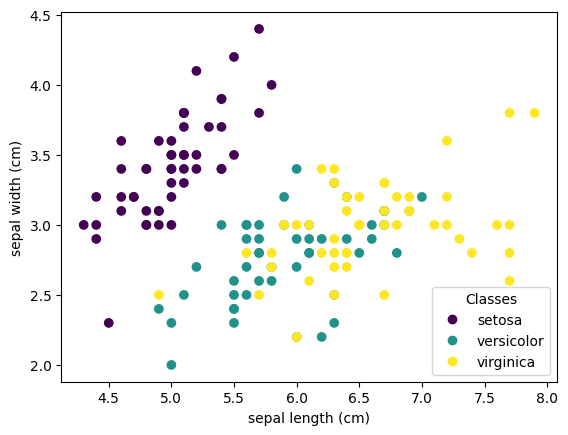

In [4]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

Les 5 premières lignes du tableau de données.

In [5]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
# Quelques statistiques descriptives.
# On commence par transformer iris en un dataframe appelé dfiris.
# Il va contenir 6 colonnes : 4 pour les variables, 1 pour le numéro d'espèce et 1 pour le nom de l'espèce.
dfiris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target']).astype({'target': int}) \
       .assign(species=lambda x: x['target'].map(dict(enumerate(iris['target_names']))))
dfiris.info()
print(dfiris.shape)
list(iris.target_names)
print(dfiris.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
(150, 6)
(150, 6)


2°. Découpage du jeu de données : $25\%$ pour le test et $75\%$ pour l'entrainement. On construit l'arbre puis on l'entraine avec les données.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.25,random_state=0)
arbre = tree.DecisionTreeClassifier()
arbre.fit(X_train, Y_train)

DecisionTreeClassifier()

3°. Affichage de l'arbre de décision.

In [8]:
# Visualisation de l'arbre
dot_data = StringIO()
tree.export_graphviz(arbre, out_file=dot_data,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

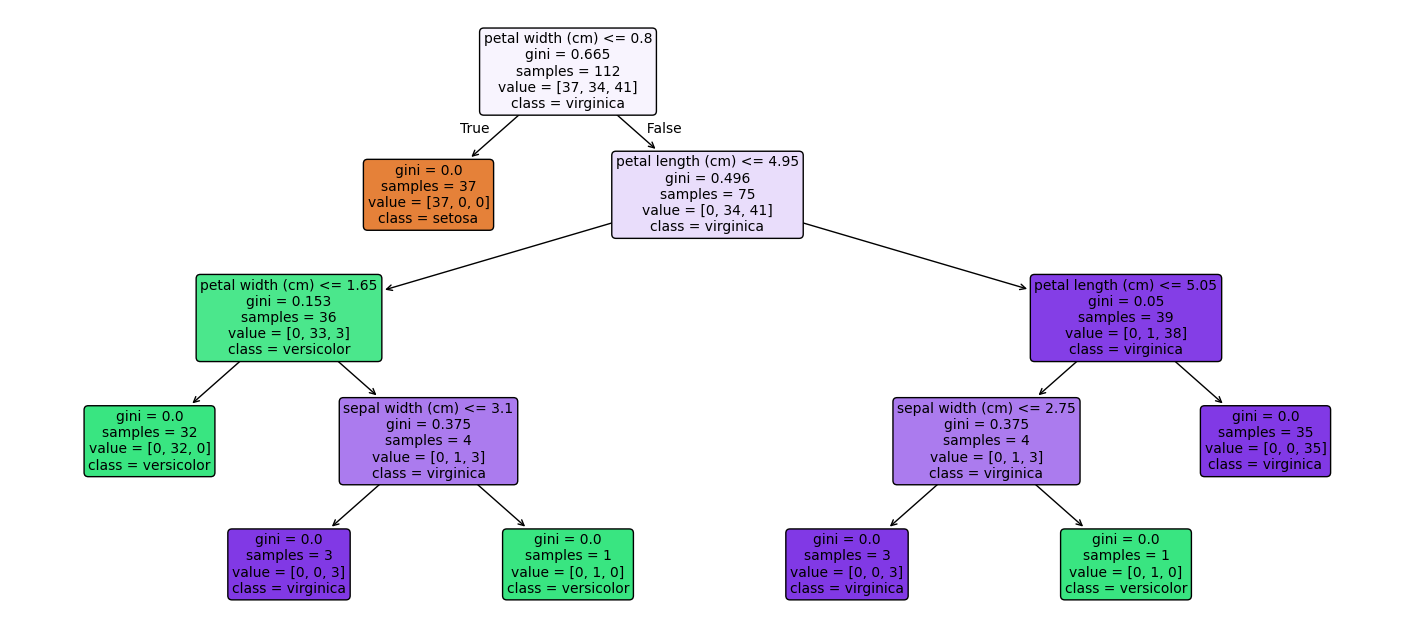

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
tree.plot_tree(arbre,feature_names=iris.feature_names,class_names = iris.target_names,rounded=True,filled=True,fontsize=10)
plt.show()

4°. Utilisation de la technique de validation croisée et évaluation des performances.

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(arbre, X_train, Y_train, cv=5, scoring="accuracy")
from sklearn.model_selection import cross_val_predict
Y_pred = cross_val_predict(arbre, X_train, Y_train, cv=3)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
print(classification_report(Y_train, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      0.94      0.94        34
           2       0.95      0.95      0.95        41

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



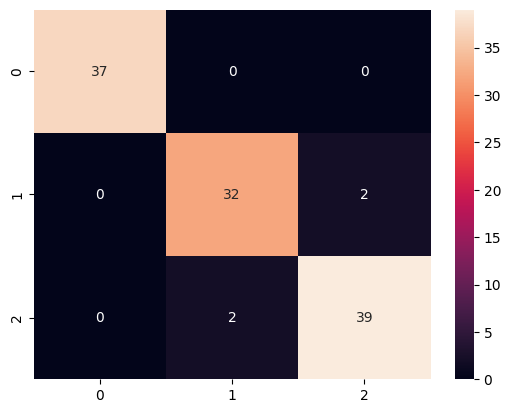

In [12]:
from sklearn.metrics import accuracy_score
Mconf = confusion_matrix(Y_train, Y_pred)
ax = sns.heatmap(Mconf,annot=True,fmt='d')

5°. **algorithme $k$-NN** sur les iris de Fisher.

In [13]:
dfiris.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.25,random_state=0)
print('Ensemble d entrainement :', X_train.shape, Y_train.shape)
print('Ensemble de test :', X_test.shape, Y_test.shape)
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
best_k = np.argmax(mean_acc)
max_accuracy = mean_acc[best_k]
print("Meilleure valeur de k =", best_k+1, "avec précision =",max_accuracy)

Ensemble d entrainement : (112, 4) (112,)
Ensemble de test : (38, 4) (38,)
Meilleure valeur de k = 1 avec précision = 0.9736842105263158


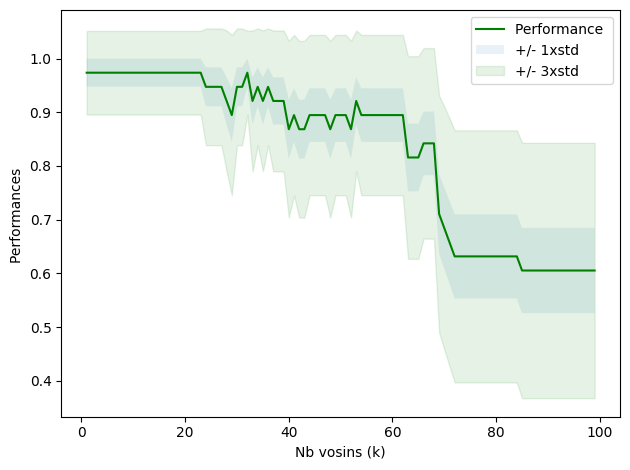

In [15]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Performance ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Performances ')
plt.xlabel('Nb vosins (k)')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
k_list = list(range(1,50,2))
cv_scores = []
X = iris.data
Y = dfiris.target

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print(k)

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Les performances du modèle sont ' + str(round(accuracy, 2)) + ' %.')

49
Les performances du modèle sont 89.47 %.


Tracé des régions de décision.

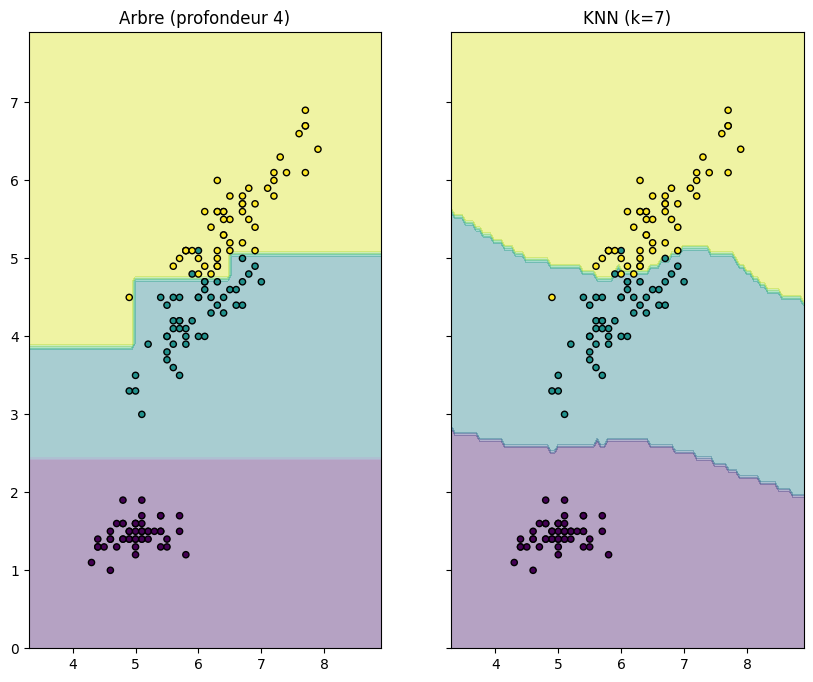

In [19]:
from itertools import product
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf1.fit(X, y)
clf2.fit(X, y)

f, axarr = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    range(2),
    [clf1, clf2],
    ["Arbre (profondeur 4)", "KNN (k=7)"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx], response_method="predict"
    )
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx].set_title(tt)
plt.show()

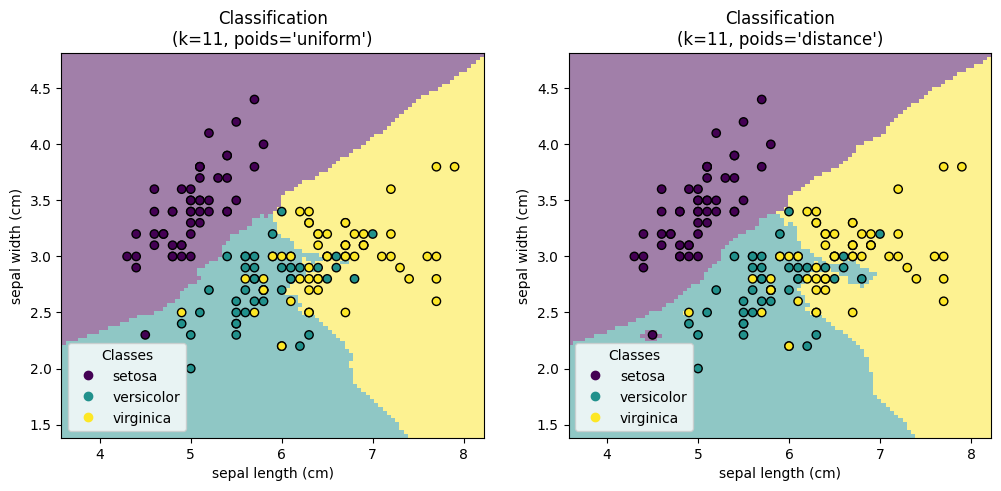

In [18]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)
_, axs = plt.subplots(ncols=2, figsize=(12, 5))
for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"Classification\n(k={clf[-1].n_neighbors}, poids={weights!r})"
    )
plt.show()

Nous observons que les pondérations des paramètres ont un impact sur la frontière de décision. Lorsque weights="uniform", tous les voisins les plus proches ont le même impact sur la décision. En revanche, lorsque weights="distance", le poids attribué à chaque voisin est proportionnel à l'inverse de la distance entre ce voisin et le point de requête.